![title](Yulu-Logo.webp)

# Yulu Case Study

## About Yulu
Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient.

## Business Problem

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

The company wants to know:

- Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
- How well those variables describe the electric cycle demand?

## Column Profiling:

- datetime: datetime
- season: season (1:spring, 2: summer, 3: fall, 4: winter)
- holiday: whether day is a holiday or not
- workingday: if day is neither weekend nor holiday is 1, otherwise is 0
- weather:
    - 1: Clear, Few clouds, partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstrom + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pellets + Thunderstrom + Mist, Snow + Fog
- temp: temperature in celsius
- atemp: feeling temperature in celsius
- humidity: humidity
- windspeed: windspeed
- casual: count of casual users
- registered: count of registered users
- count: count of total rental bikes including both casual and registered

## 1. Defining Problem Statement and Analysing basic metrics

### 1.1. Observations and Statistical Summary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import stats, binom, norm, bootstrap, boxcox

In [2]:
#Read the dataframe
yulu_df = pd.read_csv("bike_sharing.txt")
yulu_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
#Shape of the dataframe
yulu_df.shape

(10886, 12)

In [4]:
#Drop the duplicates
yulu_df.drop_duplicates(inplace=True)
yulu_df.shape

(10886, 12)

The dataframe does not contain any duplicate values

In [5]:
yulu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [49]:
yulu_df["datetime"] = pd.to_datetime(yulu_df["datetime"])
yulu_df[["datetime"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  10886 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 85.2 KB


In [6]:
yulu_df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

The dataframe does not have any missing values!

In [7]:
yulu_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


- The features season, holiday, workingday and weather are categorical in nature. 
- The mean temperature in India is around 20.23 degree celsius with a standard deviation of 7.79 degree celsius. The min and max temperatures are 0.82 and 41 degree celsius respectively. The median temperature is 20.5 degree celsius which is closer to the mean.
- The mean feeling temperature is around 23.66 degree celsius with a standard deviation of 8.47 degree celsius. The min and max feeling temperatures are 0.76 and 45.46 degree celsius respectively. The median feeling temperature is 24.24 degree celsius which is closer to the mean. 
- The mean humidity is around 61.89 with a standard deviation of 19.25. The min and max humidities are 0.0 and 100 respectively. The median humidity is around 62 which is closer to the mean. 
- The mean windspeed is 12.79 with a standard deviation of 8.16. The min and max windspeeds are 0.00 and 56.99 respectively. The median humidity is around 12.99 which is closer to the mean. 
- The mean count of casual users are around 36 users with a standard deviation of 50 users. The min and max count of casual users are 0 and 367 users. The median count of users are 17 users which is far away from the mean. 
- The mean count of registered users are around 156 users with a standard deviation of 151 users. The min and max count of casual users are 0 and 886 users. The median count of users are 118 users which is far away from the mean. 
- The mean count of total users are around 192 users with a standard deviation of 181 users. The min and max count of casual users are 1 and 977 users. The median count of users are 145 users which is far away from the mean. 
- The users categories shows are possibility of outliers present in the data. 


### 1.2. Non-Graphical Analysis

For Non-graphical analysis, only value counts operation is performed as it gives the unique values in the dataset along with the count of it.

In [10]:
#Value count of season
yulu_df["season"].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

In [12]:
#Percentage count of season
yulu_df["season"].value_counts(normalize=True)

season
4    0.251148
2    0.251056
3    0.251056
1    0.246739
Name: proportion, dtype: float64

The season durations are equally spread throughout the year

In [13]:
#Value count of holiday
yulu_df["holiday"].value_counts()

holiday
0    10575
1      311
Name: count, dtype: int64

In [14]:
#Percentage count of holiday
yulu_df["holiday"].value_counts(normalize=True)

holiday
0    0.971431
1    0.028569
Name: proportion, dtype: float64

It is a holiday only for 2.86% of the time.

In [15]:
#Value count of workingday
yulu_df["workingday"].value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

In [16]:
#Percentage count of workingday
yulu_df["workingday"].value_counts(normalize=True)

workingday
1    0.680875
0    0.319125
Name: proportion, dtype: float64

68% of the time throughout the year is a working day.

In [17]:
#Value count of weather
yulu_df["weather"].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [18]:
#Percentage count of weather
yulu_df["weather"].value_counts(normalize=True)

weather
1    0.660665
2    0.260334
3    0.078909
4    0.000092
Name: proportion, dtype: float64

66% of the time, the weather was clear/partly cloudy and 26% of the time, it was cloudy+misty. 7% of the time, the weather was with light snow/rain. The chances of heavy snow/rain was almost 0%.

### 1.3. Visual Analysis: Univariate and Bivariate

#### For Continuous Variable

C:\Users\raman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


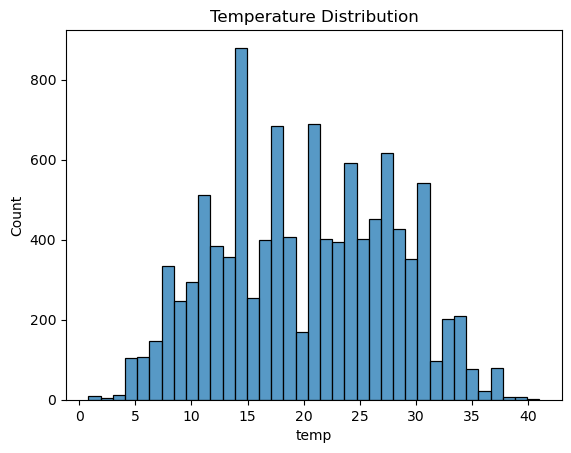

In [10]:
# Create a Histogram for Temperature using Seaborn
sns.histplot(yulu_df["temp"])
plt.title("Temperature Distribution")
plt.show()

The temperature ranges between 5 to 35 degree celsius with the highest observed temperature of 14-15 degree celsius, followed by 18 and 21 degree celsius.

C:\Users\raman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


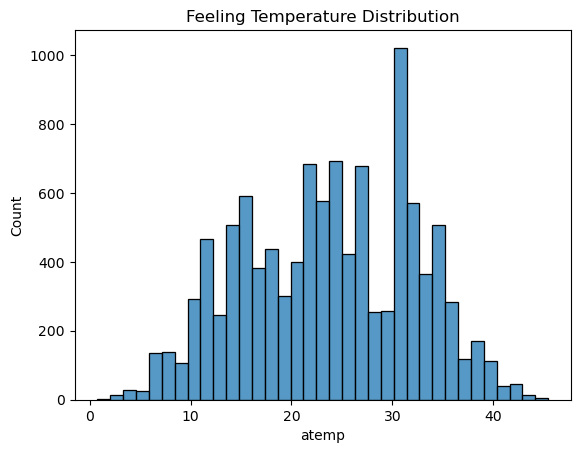

In [11]:
# Create a Histogram for feelingTemperature using Seaborn
sns.histplot(yulu_df["atemp"])
plt.title("Feeling Temperature Distribution")
plt.show()

The feeling temperature ranges between 5 and 40 degree celsius.

In [67]:
#View the relationship between temp and atemp during colder climate
cold_feel_temp_df = yulu_df[(yulu_df['temp'] >= 14) & (yulu_df['temp'] <= 16)].sort_values(by = 'temp')
cold_feel_temp_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_enc,weather_enc
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,Winter,Spring
10405,2012-11-18 23:00:00,4,0,0,1,14.76,17.425,66,15.0013,6,53,59,Winter,Spring
5906,2012-02-02 07:00:00,1,0,1,3,14.76,18.940,93,0.0000,4,201,205,Spring,Fall/Autumn
5905,2012-02-02 06:00:00,1,0,1,3,14.76,18.940,90,0.0000,1,73,74,Spring,Fall/Autumn
5884,2012-02-01 09:00:00,1,0,1,2,14.76,17.425,71,12.9980,9,267,276,Spring,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5601,2012-01-08 12:00:00,1,0,0,1,15.58,19.695,43,15.0013,78,273,351,Spring,Spring
5589,2012-01-08 00:00:00,1,0,0,1,15.58,19.695,40,19.0012,14,77,91,Spring,Spring
5566,2012-01-07 01:00:00,1,0,0,1,15.58,19.695,46,11.0014,6,56,62,Spring,Spring
5908,2012-02-02 09:00:00,1,0,1,3,15.58,19.695,87,0.0000,15,213,228,Spring,Fall/Autumn


It can be seen that at colder climates, people perceive it to be much warmer explaining the occurance that even though the actual temperature of 14-15 degree celsius occur more frequently, people perceive it to be between 17-19 degree celsius.

In [68]:
#View the relationship between temp and atemp during warmer climate
warm_feel_temp_df = yulu_df[(yulu_df['temp'] >= 26) & (yulu_df['temp'] <= 33)].sort_values(by = 'temp')
warm_feel_temp_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_enc,weather_enc
9966,2012-10-19 15:00:00,4,0,1,1,26.24,30.305,65,19.9995,93,302,395,Winter,Spring
7448,2012-05-09 17:00:00,2,0,1,2,26.24,31.060,53,8.9981,76,629,705,Summer,Summer
7496,2012-05-11 17:00:00,2,0,1,1,26.24,30.305,23,16.9979,102,677,779,Summer,Spring
7497,2012-05-11 18:00:00,2,0,1,1,26.24,30.305,23,19.0012,78,518,596,Summer,Spring
7498,2012-05-11 19:00:00,2,0,1,1,26.24,30.305,23,16.9979,73,430,503,Summer,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8787,2012-08-08 12:00:00,3,0,1,2,32.80,37.120,52,0.0000,63,217,280,Fall/Autumn,Summer
8786,2012-08-08 11:00:00,3,0,1,2,32.80,37.120,52,0.0000,80,159,239,Fall/Autumn,Summer
8785,2012-08-08 10:00:00,3,0,1,2,32.80,37.120,52,8.9981,63,151,214,Fall/Autumn,Summer
8809,2012-08-09 10:00:00,3,0,1,1,32.80,37.880,55,15.0013,72,133,205,Fall/Autumn,Spring


But, on the contrary, people perceive warmer temperatures to be much warmer explaining the occurance that even though the actual temperature of 26-33 degree celsius occur less frequently, people perceive it to be between 30-37 degree celsius.

C:\Users\raman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


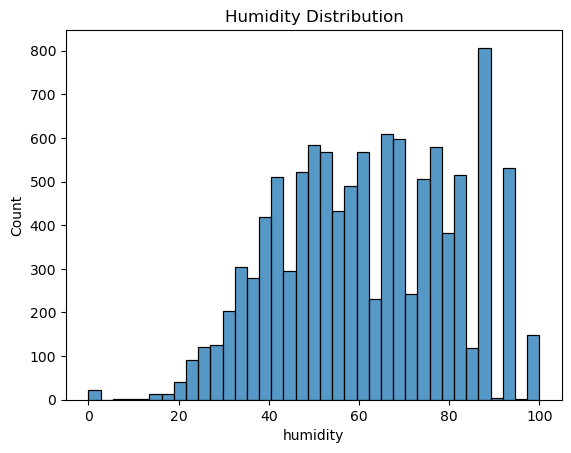

In [12]:
# Create a Histogram for humidity using Seaborn
sns.histplot(yulu_df["humidity"])
plt.title("Humidity Distribution")
plt.show()

C:\Users\raman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


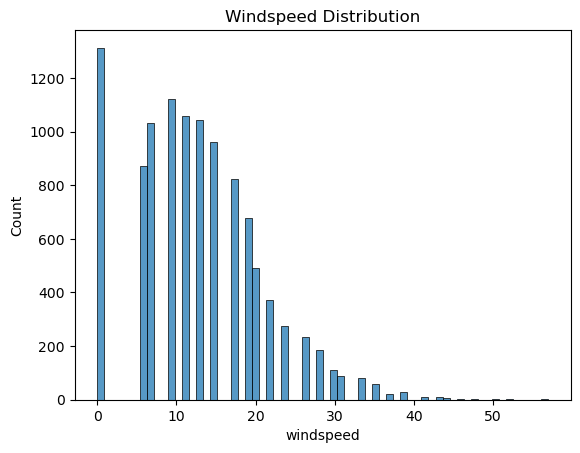

In [13]:
# Create a Histogram for windspeed using Seaborn
sns.histplot(yulu_df["windspeed"])
plt.title("Windspeed Distribution")
plt.show()

The windspeed remains 0 in most of the cases and decreases exponentially.

In [73]:
#Encoding season and weather data to make it more readalbe
dict1 = {1: 'Spring', 2: 'Summer', 3: 'Fall/Autumn', 4: 'Winter'}
yulu_df["season_enc"] = yulu_df["season"].map(dict1)

dict2 = {1: 'Sunny', 2: 'Cloudy', 3: 'Rainy', 4: 'Thunderstroms'}
yulu_df["weather_enc"] = yulu_df["weather"].map(dict2)

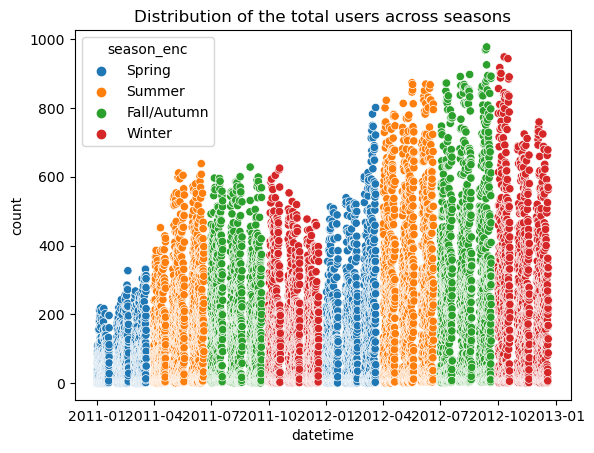

In [66]:
#Create a scatterplot between datetime and total users with season encoding
sns.scatterplot(data = yulu_df, x="datetime", y="count", hue ="season_enc" )
plt.title("Distribution of the total users across seasons")
plt.show()

We can see a clear increase in the number of users between the years 2011-2012 and 2012-2013. Also, within the year, the number of users remain the lowest during the spring season and steadily increases to a maximum number of users during the summer season. The number of users remains high during the Fall/Autumn season as well. The user count steadily declines from the onset of winter. 

#### For Categorical Variable

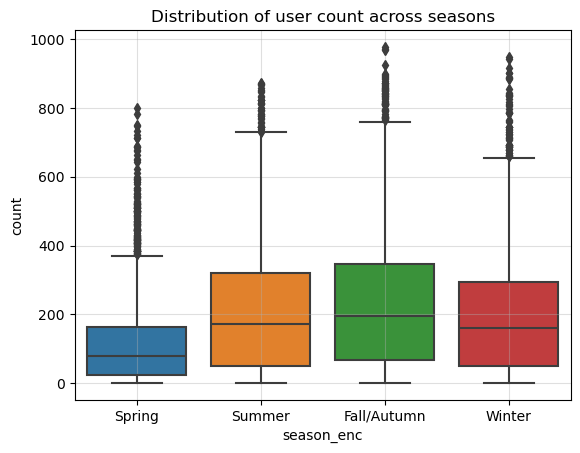

In [69]:
#Generate a 5 point summary between seasons and total users
sns.boxplot(data=yulu_df, x="season_enc", y="count")
plt.title("Distribution of user count across seasons")
plt.grid(alpha=0.4)
plt.show()

The median user count during summer and Fall/Autumn is significantly higher when compared to winter and spring. The median user count remains the least during the spring season.

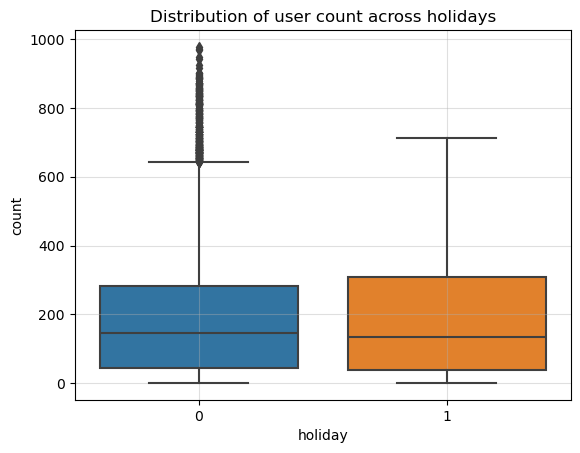

In [70]:
#Generate a 5 point summary between holidays and total users
sns.boxplot(data=yulu_df, x="holiday", y="count")
plt.title("Distribution of user count across holidays")
plt.grid(alpha=0.4)
plt.show()

The median users during holidays and non-holidays remain the same. However, there are a significant amount of outliers when there is not a holiday

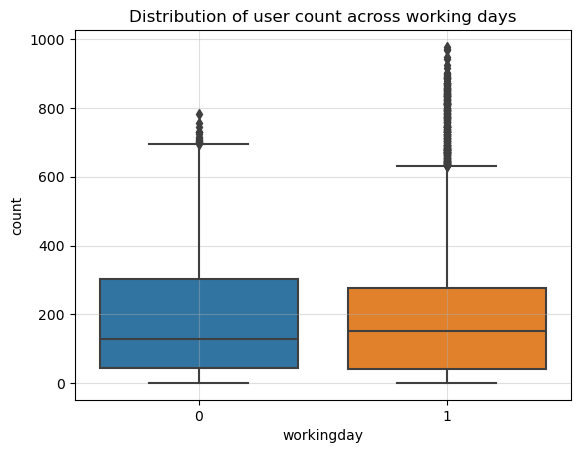

In [71]:
#Generate 5 point summary between working days and total user count
sns.boxplot(data=yulu_df, x="workingday", y="count")
plt.title("Distribution of user count across working days")
plt.grid(alpha=0.4)
plt.show()

The median users during a working day is slightly higher when compared to a non-working day

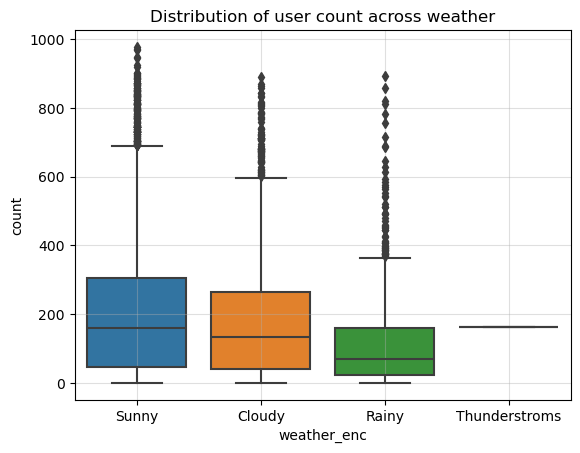

In [74]:
#Generate a 5 point summary between weather and total user count
sns.boxplot(data=yulu_df, x="weather_enc", y="count")
plt.title("Distribution of user count across weather")
plt.grid(alpha=0.4)
plt.show()

In [77]:
thunderstrom_df = yulu_df[(yulu_df['weather'] == 4)]
thunderstrom_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_enc,weather_enc
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,Spring,Thunderstroms


The median user count during sunny and cloudy days are significantly higher when compared to the rainy days. Thunderstrom occured only on one day in the given dataset, that is, on 2012-01-09 and there were 164 total users on that day.

## 2. Hypothesis Testing

#### Note:

- Since the sample we select from the dataset will be greater than 30, the mean of the samples would follow a NORMAL DISTRIBUTION according to the Central Limit Theorem (CLT). 
- Also, as sample size increases, the sample mean moves closer towards the population mean, and the spread of the sample data (standard deviation) decreases

### 2.1. 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented

#### Step 1: Define Null and Alternate Hypothesis

- Ho: The number of users on a working day is LESS THAN or EQUAL TO the number of users on weekend
- Ha: The number of users on a working day is GREATER THAN the number of users on weekend

Let mu1 and mu2 be the sample means of the working day and weekend respectively. 
Mathematically,

- Ho: mu1 <= mu2
- Ha: mu1 > mu2

#### Step 2: Select appropriate test

This is a one-tailed test concerning two population means from two independent population. As the population standard deviation is unknown, the 2-sample independent t-test would be the appropriate test for the problem.

#### Step 3: Define the significance level

As given in the problem statement, consider alpha = 0.05

#### Step 4: Collect and prepare data

In [79]:
#Select sample size to be 3474 as the number of weekends is 3474. Select same number of samples to avoid any bias. 
weekday = yulu_df[yulu_df["workingday"] == 1]["count"].sample(3474)
weekend = yulu_df[yulu_df["workingday"] == 1]["count"].sample(3474)

In [81]:
print(f"The sample std of the total number of users on weekday is: {round(weekday.std(),2)}")
print(f"The sample std of the total number of users on weekend is: {round(weekend.std(),2)}")

The sample std of the total number of users on weekday is: 183.29
The sample std of the total number of users on weekend is: 184.93


Since the sample std is different, the population std can also be assumed to be different

#### Step 5: Calculate the p-value

In [84]:
from scipy.stats import ttest_ind

t_test, p_value = ttest_ind(weekday, weekend, equal_var = False, alternative = 'greater')
print(p_value)
#Since the sample std is different, we need to mention that equal variance is False. By default, ttest assumes equal variances. 

0.5442816024537863


In [86]:
#Conclusion based on p-value
if p_value < 0.05:
    print("Reject Ho")
else:
    print("Fail to reject Ho")

Fail to reject Ho


The test concludes that the number of users on a working day is LESS THAN or EQUAL TO the number of users on weekend

### 2.2. ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season

#### Step 1: Define Null and Alternate Hypothesis

1. Weather
- Ho: The mean number of users during different weather conditions are same.
- Ha: The mean number of users during different weather conditions are different.

2. Season
- Ho: The mean number of users during different seasonal conditions are same.
- Ha: The mean number of users during different seasonal conditions are different.

#### Step 2: Select Appropriate test

This is a problem concerning independent population means greater than 2. One-way ANOVA would be an ideal test here given that we have already established normality condition for our dataset using CLT assumption. But, anyways let us test for normality and variance again.

- For testing normality, we can use visual methods like qq-plot or histplot with kde or statistical methods such as the Shapiro-Wilk's test
- For testing equality of variance, we can use Levene's test

#### Test for Normality:
#### Shapiro-Wilk's test

The assumptions are as follows:

- Ho: Count follows normal distribution
- Ha: Count does not follow normal distribution

In [96]:
from scipy.stats import shapiro

w, p_value = shapiro(yulu_df["count"].sample(3000))
print(p_value)

5.4650640108667866e-43


In [99]:
#Conclusion based on p-value
if p_value < 0.05:
    print("Reject Ho")
else:
    print("Fail to reject Ho")

Reject Ho


The Shapiro-Wilk's test infers that the data is not normal

C:\Users\raman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


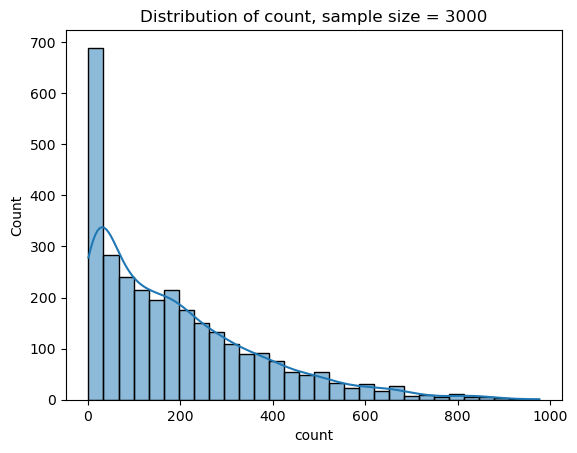

In [100]:
sns.histplot(yulu_df["count"].sample(3000), kde=True)
plt.title("Distribution of count, sample size = 3000")
plt.show()

In [97]:
count_sample_3000 = [np.mean(yulu_df["count"].sample(3000))for i in range(10000)] # Take a random sample of specified size 3000

C:\Users\raman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


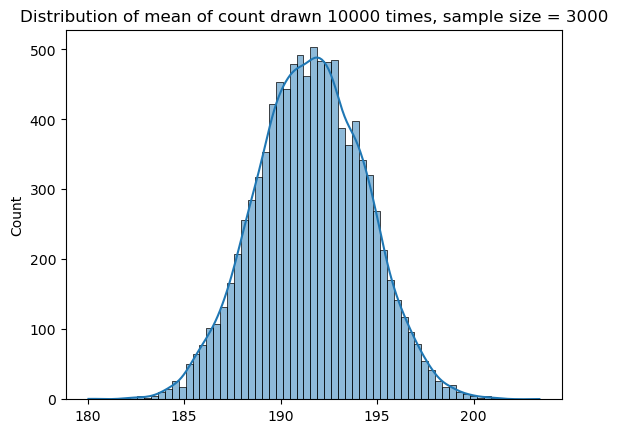

In [101]:
sns.histplot(count_sample_3000, kde=True)
plt.title("Distribution of mean of count drawn 10000 times, sample size = 3000")
plt.show()

Since the distribution of the mean of the count is normal, we can proceed with ANOVA and other tests where data needs to be normal.

#### Test for equal Variance
#### Levene's test

- Ho: Variances are equal
- Ha: Variances are not equal

In [102]:
from scipy.stats import levene

statistic, p_value = levene(w1, w2, w3)
print(p_value)

1.6341869596786996e-21


In [103]:
#Conclusion based on p-value
if p_value < 0.05:
    print("Reject Ho")
else:
    print("Fail to reject Ho")

Reject Ho


The Levene's test concludes that the data has different variances

In [104]:
print(w1.var(), w2.var(), w3.var())

37212.9870641582 30583.50261186239 19204.775892714177


#### Step 3: Define the significance level

As given in the problem statement, consider alpha = 0.05

#### Step 4: Collect and prepare data

In [87]:
yulu_df["weather"].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [90]:
yulu_df["season"].value_counts()

season
4    2734
2    2733
3    2733
1    2685
Name: count, dtype: int64

In [88]:
yulu_df = yulu_df[~(yulu_df["weather"] == 4)]

In [89]:
w1 = yulu_df[yulu_df["weather"] == 1]["count"].sample(859)
w2 = yulu_df[yulu_df["weather"] == 2]["count"].sample(859)
w3 = yulu_df[yulu_df["weather"] == 3]["count"].sample(859)

In [91]:
s1 = yulu_df[yulu_df["season"] == 1]["count"].sample(2685)
s2 = yulu_df[yulu_df["season"] == 2]["count"].sample(2685)
s3 = yulu_df[yulu_df["season"] == 3]["count"].sample(2685)
s4 = yulu_df[yulu_df["season"] == 4]["count"].sample(2685)

In [93]:
yulu_df.groupby(["weather"])["count"].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0


In [94]:
yulu_df.groupby(["season"])["count"].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2685.0,116.325512,125.293931,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


#### Step 5: Calculate the p-value

In [105]:
from scipy.stats import f_oneway
#for weather
test_stat, p_value = f_oneway(w1,w2,w3)
print(p_value)

2.0383282955694535e-27


In [106]:
#Conclusion based on p-value
if p_value < 0.05:
    print("Reject Ho")
else:
    print("Fail to reject Ho")

Reject Ho


The ANOVA test concludes that the mean number of users during different weather conditions are different.

In [107]:
from scipy.stats import f_oneway
#for seasons
test_stat, p_value = f_oneway(s1,s2,s3,s4)
print(p_value)

3.316324058268962e-148


In [108]:
#Conclusion based on p-value
if p_value < 0.05:
    print("Reject Ho")
else:
    print("Fail to reject Ho")

Reject Ho


The ANOVA test concludes that the mean number of users during different seasonal conditions are different.

### 2.3. Chi-square test to check if Weather is dependent on the season

#### Step 1: Define Null and Alternate Hypothesis

- Ho: Weather conditions are independent of the season
- Ha: Weather conditions depend on the ongoing season

#### Step 2: Select Appropriate test

Here, we are comparing 2 categorical variables, "season" and "weather". Hence, we would use Chi-square test.

#### Step 3: Define the significance level

As given in the problem statement, consider alpha = 0.05

#### Step 4: Collect and prepare data

In [110]:
contingency = pd.crosstab(yulu_df["season_enc"], yulu_df["weather_enc"])
print(contingency)

weather_enc  Cloudy  Rainy  Sunny
season_enc                       
Fall/Autumn     604    199   1930
Spring          715    211   1759
Summer          708    224   1801
Winter          807    225   1702


#### Step 5: Calculate the p_value

In [111]:
from scipy.stats import chi2_contingency #Chi-square test of independence

chi, p_value, dof, exp_freq = chi2_contingency(contingency, correction = False)
print(p_value)

2.826001450992924e-08


In [112]:
#Conclusion based on p-value
if p_value < 0.05:
    print("Reject Ho")
else:
    print("Fail to reject Ho")

Reject Ho


The chi-square test of indenpendence concludes that the weather conditions depend on the ongoing season